# Feature Selection using Tree Importance by `Mr. Harshit Dawar!`
* This method takes into account the Importancce of the Features using the Tree Internal Calculations. Those Internal calculations are:
    * For Regression:
        * Variance
    * For Classification:
        * Entropy, Information Gain, & Gain.
        
* In this practical, a pre defined Number of Features will be selected by using the RandomForestRegressor & SelectFromModel class(used to select features based on the model internals) of sklearn.

* This method is highly biased towards Cardinal Features.

* This method is highly susceptible to the Correlated Vaariables

In [2]:
# Importing the required Libraries!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import load_boston

In [3]:
# Loading the Dataset!

X, y = load_boston(return_X_y = True)

In [4]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
# Generating Feature Selector!

Feature_Selector = SelectFromModel(RandomForestRegressor())
Feature_Selector.fit(X, y)

SelectFromModel(estimator=RandomForestRegressor())

In [7]:
# Checking which Features are selected!
Feature_Selector.get_support()

array([False, False, False, False, False,  True, False, False, False,
       False, False, False,  True])

In [12]:
count = 0
for i in Feature_Selector.get_support():
    if i: count += 1

print("Total Features: {}\nFeatures Left After applying Tree Importance Feature Selection: {}\nFeatures Dropped by Tree Importance Feature Selection: {}".format(X.shape[1], count,X.shape[1] - count))

Total Features: 13
Features Left After applying Tree Importance Feature Selection: 2
Features Dropped by Tree Importance Feature Selection: 11


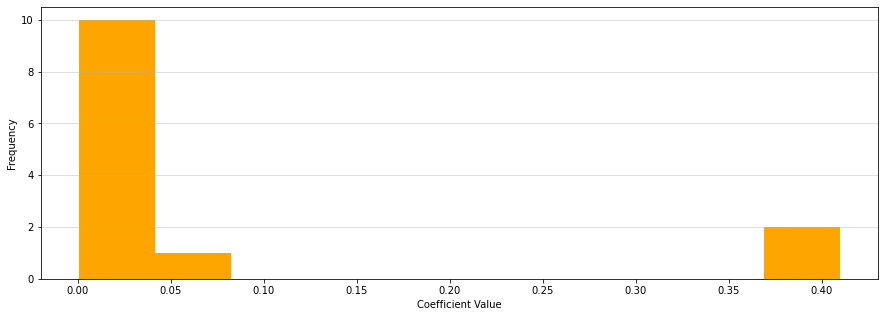

In [10]:
# Plotting the Histogram of the Coefficient Values! 

pd.Series(Feature_Selector.estimator_.feature_importances_).plot.hist(figsize = (15, 5), color = "orange")
plt.grid(axis = "y", animated = True, alpha = 0.5)
plt.xlabel("Coefficient Value")
plt.show()

# Congratulations, you have learned a new way of Selecting Features!